# Import Module & Define Function

In [2]:
# import the necessary packages
import imutils
import cv2
from matplotlib import pyplot as plt
import numpy
import os
import pandas
import pickle

In [3]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [4]:
def count_files(path):
    count = 0
    for root_dir, cur_dir, files in os.walk(path):
        count += len(files)
    return count

# Original (Testing)

In [ ]:
images = load_images_from_folder('game_frame/participant_0/participant_0_30000')

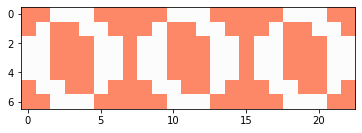

In [188]:
plt.imshow(images[0][24:31,32:55], cmap='gray')
plt.show()

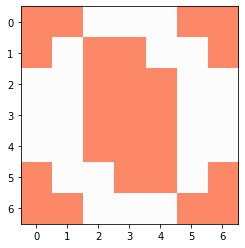

In [195]:
plt.imshow(images[0][24:31,48:55], cmap='gray')
plt.show()

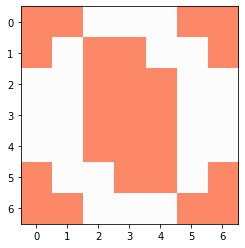

In [193]:
plt.imshow(images[0][24:31,40:47], cmap='gray')
plt.show()

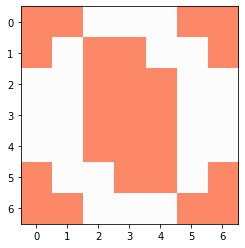

In [190]:
plt.imshow(images[0][24:31,32:39], cmap='gray')
plt.show()

In [ ]:
stage_display_1=[]
stage_display_2=[]
for i,image in enumerate(images):
    stage_display_1.append(image[23:32,151:160])
    stage_display_2.append(image[23:32,167:176])
    #stage_display_1[i] = image[23:32,151:160]
    #stage_display_2[i] = image[23:32,167:176]

In [ ]:
display_1_dictionary = []
for image in stage_display_1:
    image_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_bin = numpy.interp(image_bw, (image_bw.min(), image_bw.max()), (0, +1))
    flag=False
    for item in display_1_dictionary:
        if numpy.array_equal(item,image_bin):
            flag=True
            break
        else:
            flag=False
    if flag!=True:
        display_1_dictionary.append(image_bin)
    
    print(len(display_1_dictionary))

In [ ]:
display_2_dictionary = []
for image in stage_display_2:
    image_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_bin = numpy.interp(image_bw, (image_bw.min(), image_bw.max()), (0, +1))
    flag=False
    for item in display_2_dictionary:
        if numpy.array_equal(item,image_bin):
            flag=True
            break
        else:
            #plt.imshow(numpy.subtract(item,image_bin))
            #plt.show()
            flag=False
    if flag!=True:
        display_2_dictionary.append(image_bin)
    
    print(len(display_2_dictionary))

In [ ]:
for image in display_1_dictionary:
    flag=False
    for item in display_2_dictionary:
        if numpy.array_equal(item,image):
            flag=True
            break
        else:
            #plt.imshow(numpy.subtract(item,image_bin))
            #plt.show()
            flag=False
    print(flag)

In [ ]:
for image in display_2_dictionary:
    plt.imshow(image, cmap='gray')
    print(image)
    plt.show()

# All image (Finding dictionary)

In [211]:
score_display_lib=[]

In [227]:
print("going")
image_lib = load_images_from_folder('game_frame/participant_0/participant_90001_end')
print("imported")

going
imported


In [ ]:
for i,image in enumerate(image_lib):
    d1 = image[24:31,48:55]
    d10 = image[24:31,40:47]
    d100 = image[24:31,32:39]
    image_bw1 = cv2.cvtColor(d1, cv2.COLOR_BGR2GRAY)
    image_bw10 = cv2.cvtColor(d10, cv2.COLOR_BGR2GRAY)
    image_bw100 = cv2.cvtColor(d100, cv2.COLOR_BGR2GRAY)
    image_bin1 = numpy.interp(image_bw1, (image_bw1.min(), image_bw1.max()), (0, +1))
    image_bin10 = numpy.interp(image_bw10, (image_bw10.min(), image_bw10.max()), (0, +1))
    image_bin100 = numpy.interp(image_bw100, (image_bw100.min(), image_bw100.max()), (0, +1))
    for image in [image_bin1, image_bin10, image_bin100]:
        flag=False
        for item in score_display_lib:
            if numpy.array_equal(item,image):
                flag=True
                break
            else:
                flag=False
        if flag!=True:
            score_display_lib.append(image)
            print(f"new {i}")
print("end")

In [229]:
len(score_display_lib)

478

In [ ]:
for i,image in enumerate(score_display_lib[136:150]):
    plt.imshow(image,cmap="Greys")
    plt.show()
    print(i+136)

In [230]:
numpy.save("./data_dump/score_display_lib.npy",score_display_lib)

In [ ]:
print(score_display_lib[0])

In [215]:
file_score_display = open("./data_dump/score_display_lib.npy", "wb")
pickle.dump(score_display_lib, file_score_display)
file_stage_display_1.close()

In [232]:
del image_lib

# dictionary

In [ ]:
score_display_dictionary = {
    0: [],
    1: [],
    2: [],
    3: [],
    4: [],
    5: [],
    6: [],
    7: [],
    8: [],
    9: []
}

In [262]:
for i in [8]:
    score_display_dictionary[9].append(score_display_lib[i])

In [265]:
len(score_display_dictionary[9])

1

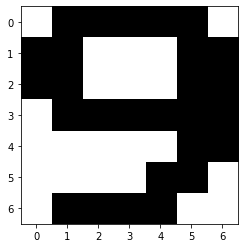

In [266]:
plt.imshow(score_display_dictionary[9][0], cmap="Greys")
plt.show()

# Saving and Loading Dictionary

In [267]:
file_score_display = open("./data_dump/score_display_dictionary.npy", "wb")
pickle.dump(score_display_dictionary, file_score_display)
file_score_display.close()

In [268]:
file_stage_display_1 = open("./data_dump/score_display_dictionary.npy", "rb")
output1 = pickle.load(file_stage_display_1)
print(output1[1][0])
file_stage_display_1.close()

[[0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1.]]


# Comparison & Prediction

In [ ]:
img1 = cv2.imread(f'game_frame/game_frame_participant_1/game_0.png')
#img1 = cv2.imread(f'game_frame/game_frame_participant_1/game_0.png')
img2 = cv2.imread(f'game_frame/game_frame_participant_1/game_63226.png')
plt.imshow(img1)
plt.show()
plt.imshow(img2)
plt.show()

In [281]:
SAMETIME_FRAME = 20
START_FRAME = 20
participant = 0
current_frame = 20
current_score = 0

In [10]:
file_time_display = open("./data_dump/time_display_dictionary.npy", "rb")
time_display_dictionary = pickle.load(file_time_display)
# print(stage_display_1_dictionary[1][0])
file_time_display.close()

### start from here

In [5]:
# function to return key for any value
def get_key_time_dict(val):
    val_bw = cv2.cvtColor(val, cv2.COLOR_BGR2GRAY)
    val_bin = numpy.interp(val_bw, (val_bw.min(), val_bw.max()), (0, +1))
    for key, dict_list in time_display_dictionary.items():
        for dict_val in dict_list:
            if numpy.array_equal(val_bin,dict_val):
                return True, key
    return False, 0

In [6]:
def get_current_time(current_frame, last_time, frame):
    d100 = frame[24:31,208:215]
    d10 = frame[24:31,216:223]
    d1 = frame[24:31,224:231]
    
    num1_valid, time_num1 = get_key_time_dict(d1)
    if not num1_valid:
        return last_time
    num10_valid, time_num10 = get_key_time_dict(d10)
    if not num10_valid:
        return last_time
    num100_valid, time_num100 = get_key_time_dict(d100)
    if not num100_valid:
        return last_time

    cur_time = int(f"{time_num100}{time_num10}{time_num1}")
    return cur_time

In [8]:
def status_down_check(frame_num, counting_time, counter, frame):
    cur_time = get_current_time(frame_num, counting_time, frame)
    if (cur_time==400 or cur_time==300):
        counter=0
        return True, cur_time, counter
    if (counter>TIME_THRESHOLD and cur_time==counting_time):
        counter=0
        return True, cur_time, counter
    elif (cur_time != counting_time):
        counter=0
        return False, cur_time, counter
    else:
        counter = counter+1
        return False, cur_time, counter

In [27]:
status_down_frame = []
status_down_time = []
for frame_number in range(1,count_files(f'game_frame/game_frame_participant_{participant}/')):
# for frame_number in range(61277, 67301):
    # print(counter)
    # check.append(counting_time)
    # count.append(counter)
    flag, counting_time, counter = status_down_check(frame_number, counting_time, counter)
    if flag:
        if (counting_time in [400,300]) and time_frozen:
            continue
        elif (counting_time in [400,300]) and not time_frozen:
            status_down_frame.append(frame_number)
            status_down_time.append(counting_time)
            print(f"{frame_number} {counting_time} {time_frozen}")
            time_frozen = True
            print("time frozen")
        else:
            print(f"{frame_number} {counting_time} {time_frozen}")
            print("time not frozen - status down")
            time_frozen = False


837 360 True
time not frozen - status down
874 360 False
time not frozen - status down
2059 300 False
time frozen
4747 376 True
time not frozen - status down
4784 376 False
time not frozen - status down
5886 322 False
time not frozen - status down
5923 322 False
time not frozen - status down
6344 300 False
time frozen


KeyboardInterrupt: 

In [73]:
df = pandas.DataFrame(columns=['frame', 'time'])

df['frame'] = status_down_frame
df['time'] = status_down_time
df.to_csv(f'./participant_{participant}_status_down.csv')

In [ ]:
print(count)

In [ ]:
print(check)

In [ ]:
# load the two input images
imageA = cv2.imread("./game_frame/game_frame_participant_0/game_4400.png")
imageB = cv2.imread("./game_frame/game_frame_participant_0/game_4401.png")
imageA_stage = imageA[23:32,151:177]
imageA_point = imageA[23:32,39:71]
imageB_stage = imageB[23:32,151:177]

In [ ]:
# convert the images to grayscale
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

plt.imshow(imageA_stage, cmap='gray')
plt.show()
plt.imshow(imageB_stage, cmap='gray')
plt.show()

In [ ]:
stage_display_1 = imageA[23:32,151:160]
stage_display_2 = imageA[23:32,167:176]
plt.imshow(stage_display_A1, cmap='gray')
plt.show()
plt.imshow(stage_display_A2, cmap='gray')
plt.show()
stage_display_A1_bw = cv2.cvtColor(stage_display_A1, cv2.COLOR_BGR2GRAY)
plt.imshow(stage_display_A1_bw, cmap='gray')
plt.show()

In [ ]:
a = numpy.interp(stage_display_A1_bw, (stage_display_A1_bw.min(), stage_display_A1_bw.max()), (0, +1))

In [ ]:
plt.imshow(a, cmap='gray')
plt.show()

In [ ]:
point_display_A = grayA[23:32,39:71]
plt.imshow(point_display_A, cmap='gray')
plt.show()
point_display_A.shape

In [ ]:
from PIL import Image, ImageOps
import numpy

# open image
img = Image.fromarray(stage_display_A1)

# border color
color = "black"

# top, right, bottom, left
#border = (3, 12, 3, 11)
border = (0, 12, 0, 11)

new_img = ImageOps.expand(img, border=border, fill=color)

# save new image
new_img.save("test_image_result.jpg")

# show new bordered image in preview
imageA_stage_reshape = numpy.array(new_img)